<a href="https://colab.research.google.com/github/alexisbianco0919/compsci216-project/blob/main/Mention_mh_interview_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import needed libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
from scipy import stats

In [ ]:
# download data from merged_data.csv
cd = pd.read_csv('https://raw.githubusercontent.com/alexisbianco0919/compsci216-project/main/clean_data_4.csv')
cd['age_range'] = pd.cut(cd['age'], [0, 20, 30, 40, 50, 60, 100])
cd_2016 = cd[cd['year'] == 2016]
cd_2017 = cd[cd['year'] == 2017]
cd_2018 = cd[cd['year'] == 2018]
cd_2019 = cd[cd['year'] == 2019]
# print mh values
print(cd['mention_mh_interview'].value_counts())
print('\n')

# print ph values
print(cd['mention_ph_interview'].value_counts())
print('\n')

# print year values
print(cd['year'].value_counts())
print('\n')

# print mh values grouped by year
print(cd.groupby('year')['mention_mh_interview'].value_counts())
print('\n')

# print ph values grouped by year
print(cd.groupby('year')['mention_ph_interview'].value_counts())
print('\n')

# visualize data
# print(cd.columns)
cd

No       1059
Maybe     391
Yes        75
Name: mention_mh_interview, dtype: int64


Maybe    1265
No        994
Yes       699
Name: mention_ph_interview, dtype: int64


2016    1433
2017     756
2018     417
2019     352
Name: year, dtype: int64


year  mention_mh_interview
2017  No                      524
      Maybe                   194
      Yes                      38
2018  No                      297
      Maybe                   100
      Yes                      20
2019  No                      238
      Maybe                    97
      Yes                      17
Name: mention_mh_interview, dtype: int64


year  mention_ph_interview
2016  Maybe                   633
      No                      441
      Yes                     359
2017  Maybe                   303
      No                      278
      Yes                     175
2018  Maybe                   177
      No                      161
      Yes                      79
2019  Maybe                   152
      No

,self_employeed,company_size,tech_company,tech_prole,mh_benefits,anonymity,leaving_difficulty,disc_mh_coworker,disc_mh_supervisor,reveal_mh_business,...,sought_treatment,age,gender,country_live,state_live,country_work,state_work,year,gender_cleaned,age_range
0,False,26-100,True,NaN,Not eligible for coverage / NA,I don't know,NaN,NaN,NaN,NaN,...,NaN,39.0,Male,United Kingdom,NaN,United Kingdom,NaN,2016,male,"(30, 40]"
1,False,6-25,True,NaN,No,Yes,NaN,NaN,NaN,NaN,...,NaN,29.0,male,United States of America,Illinois,United States of America,Illinois,2016,male,"(20, 30]"
2,False,6-25,True,NaN,No,I don't know,NaN,NaN,NaN,NaN,...,NaN,38.0,Male,United Kingdom,NaN,United Kingdom,NaN,2016,male,"(30, 40]"
3,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sometimes, if it comes up",...,NaN,43.0,male,United Kingdom,NaN,United Kingdom,NaN,2016,male,"(40, 50]"
4,False,6-25,False,True,Yes,No,NaN,NaN,NaN,NaN,...,NaN,43.0,Female,United States of America,Illinois,United States of America,Illinois,2016,female,"(40, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,False,More than 1000,False,True,I don't know,I don't know,Somewhat difficult,No,No,NaN,...,False,27.0,male,India,NaN,India,NaN,2019,male,"(20, 30]"
2954,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable to me,...,False,48.0,m,United States of America,Louisiana,United States of America,Louisiana,2019,male,"(40, 50]"
2955,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable to me,...,False,50.0,M,India,NaN,India,NaN,2019,male,"(40, 50]"
2956,False,More than 1000,True,True,No,Yes,Difficult,Maybe,No,NaN,...,False,30.0,female,India,NaN,India,NaN,2019,female,"(20, 30]"


# Demographics 

## Gender

mention_mh_interview  Maybe   No  Yes   sum
gender_cleaned                             
female                   79  361    8   448
male                    290  648   65  1003
other                    11   27    1    39
transgender               5    4    1    10 


mention_mh_interview        No     Maybe       Yes
gender_cleaned                                    
female                0.805804  0.176339  0.017857
male                  0.646062  0.289133  0.064806
other                 0.692308  0.282051  0.025641
transgender           0.400000  0.500000  0.100000











<AxesSubplot:xlabel='gender_cleaned'>

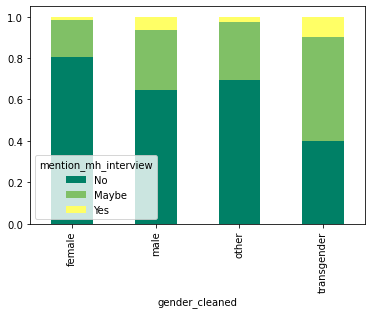

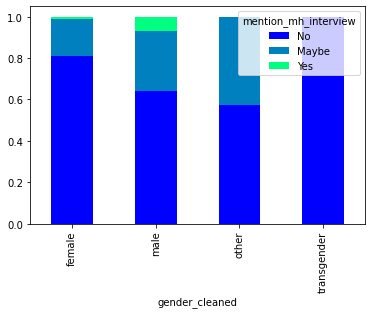

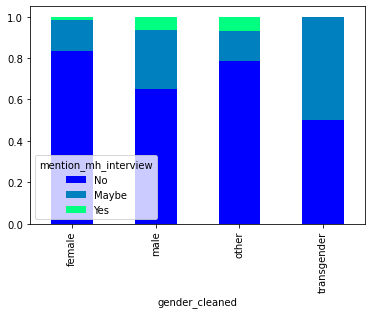

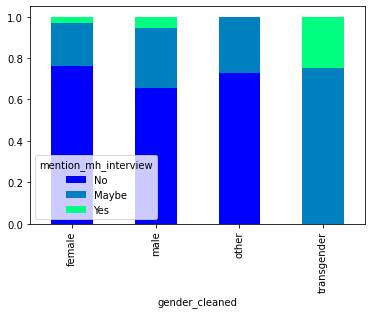

In [ ]:
#gender
gender_nums = cd.pivot_table(index='gender_cleaned', columns=['mention_mh_interview'], aggfunc='size')
gender_nums["sum"] = gender_nums.sum(axis=1)
print(gender_nums, '\n\n')

gender_props = gender_nums.loc[:,"Maybe":"Yes"].div(gender_nums["sum"], axis=0)
gender_props = gender_props.reindex(columns=["No", "Maybe", "Yes"])

print(gender_props)

#2016
df2016 = cd_2016[['gender_cleaned', 'mention_mh_interview']]
gender_nums_16 = cd_2016.pivot_table(index='gender_cleaned', columns=['mention_mh_interview'], aggfunc='size')
gender_nums_16["sum"] = gender_nums_16.sum(axis=1)

gender_props_16 = gender_nums_16.loc[:,"Maybe":"Yes"].div(gender_nums_16["sum"], axis=0)
gender_props_16 = gender_props.reindex(columns=["Yes", "Maybe", "No"])

#2017
df2017 = cd_2017[['gender_cleaned', 'mention_mh_interview']]
gender_nums_17 = cd_2017.pivot_table(index='gender_cleaned', columns=['mention_mh_interview'], aggfunc='size')
gender_nums_17["sum"] = gender_nums_17.sum(axis=1)

gender_props_17 = gender_nums_17.loc[:,"Maybe":"Yes"].div(gender_nums_17["sum"], axis=0)
gender_props_17 = gender_props_17.reindex(columns=["No", "Maybe", "Yes"])
#print(gender_props_17, '\n\n')

#2018
df2018 = cd_2018[['gender_cleaned', 'mention_mh_interview']]
gender_nums_18 = cd_2018.pivot_table(index='gender_cleaned', columns=['mention_mh_interview'], aggfunc='size')
gender_nums_18["sum"] = gender_nums_18.sum(axis=1)

gender_props_18 = gender_nums_18.loc[:,"Maybe":"Yes"].div(gender_nums_18["sum"], axis=0)
gender_props_18 = gender_props_18.reindex(columns=["No", "Maybe", "Yes"])
#print(gender_props_18, '\n\n')

#2019
df2019 = cd_2019[['gender_cleaned', 'mention_mh_interview']]
gender_nums_19 = cd_2019.pivot_table(index='gender_cleaned', columns=['mention_mh_interview'], aggfunc='size')
gender_nums_19["sum"] = gender_nums_19.sum(axis=1)

gender_props_19 = gender_nums_19.loc[:,"Maybe":"Yes"].div(gender_nums_19["sum"], axis=0)
gender_props_19 = gender_props_19.reindex(columns=["No", "Maybe", "Yes"])

#plots
gender_props.plot(kind='bar', stacked=True, colormap='summer')
print('\n\n')
gender_props_17.plot(kind='bar', stacked=True, colormap='winter')
print('\n\n')
gender_props_18.plot(kind='bar', stacked=True, colormap='winter')
print('\n\n')
gender_props_19.plot(kind='bar', stacked=True, colormap='winter')

mention_mh_interview        No     Maybe       Yes
year                                              
2017                  0.693122  0.256614  0.050265
2018                  0.712230  0.239808  0.047962
2019                  0.676136  0.275568  0.048295 


    level_0  year      prop answer
0    mental  2017  0.693122     No
1    mental  2018  0.712230     No
2    mental  2019  0.676136     No
3  physical  2017  0.367725     No
4  physical  2018  0.386091     No
5  physical  2019  0.323864     No
0    mental  2017  0.256614  Maybe
1    mental  2018  0.239808  Maybe
2    mental  2019  0.275568  Maybe
3  physical  2017  0.400794  Maybe
4  physical  2018  0.424460  Maybe
5  physical  2019  0.431818  Maybe
0    mental  2017  0.050265    Yes
1    mental  2018  0.047962    Yes
2    mental  2019  0.048295    Yes
3  physical  2017  0.231481    Yes
4  physical  2018  0.189448    Yes
5  physical  2019  0.244318    Yes


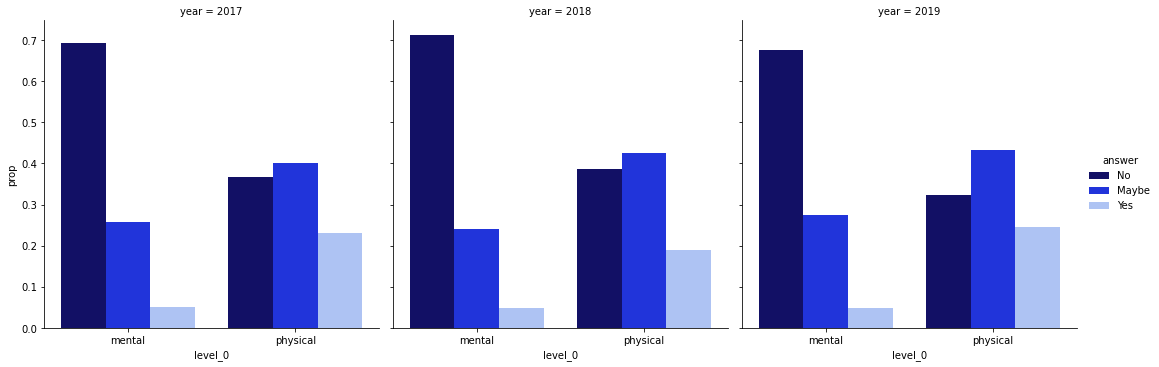

In [ ]:
#Difference between mental and physical health 

#proportions from mental health by year
mh_year_nums = cd.pivot_table(index='year', columns=['mention_mh_interview'], aggfunc='size')
mh_year_nums["sum"] = mh_year_nums.sum(axis=1)
#print(mh_year_nums, '\n\n')

mh_year_props = mh_year_nums.loc[:,"Maybe":"Yes"].div(mh_year_nums["sum"], axis=0)
mh_year_props = mh_year_props.reindex(columns=["No", "Maybe", "Yes"])
print(mh_year_props, '\n\n')

#proportions for physical health by year
#remove 2016 because no data for mentioning mental health in an interview?
cd_no16 = cd[cd["year"] != 2016]

ph_year_nums = cd_no16.pivot_table(index='year', columns=['mention_ph_interview'], aggfunc='size')
ph_year_nums["sum"] = ph_year_nums.sum(axis=1)
#print(ph_year_nums, '\n\n')

ph_year_props = ph_year_nums.loc[:,"Maybe":"Yes"].div(ph_year_nums["sum"], axis=0)
ph_year_props = ph_year_props.reindex(columns=["No", "Maybe", "Yes"])
#print(ph_year_props)

concat = pd.concat([mh_year_props, ph_year_props], keys=['mental', 'physical'])
concat = concat.reset_index()
#print(concat)

#separate nos
concat_no = concat.drop(columns=['Maybe', 'Yes'])
concat_no.insert(3, "answer", "No")
concat_no = concat_no.rename({"No": "prop"}, axis='columns')
#print(concat_no)

#separate maybes
concat_maybe = concat.drop(columns=['No', 'Yes'])
concat_maybe.insert(3, "answer", "Maybe")
concat_maybe = concat_maybe.rename({"Maybe": "prop"}, axis='columns')
#print(concat_maybe)

#separate yes
concat_yes = concat.drop(columns=['No', 'Maybe'])
concat_yes.insert(3, "answer", "Yes")
concat_yes = concat_yes.rename({"Yes": "prop"}, axis='columns')
#print(concat_yes)

#final concat 
concat_final = pd.concat([concat_no, concat_maybe, concat_yes])
print(concat_final)

palette = {"No": "#040273" ,
           "Maybe":"#021bf9", 
           "Yes":"#a2bffe"}
sns.catplot(x="level_0", y="prop", kind="bar", data=concat_final, palette=palette, col="year", hue="answer")

## Age

mention_mh_interview  Maybe   No  Yes  sum
age_range                                 
(0, 20]                   5    9    0   14
(20, 30]                116  356   25  497
(30, 40]                183  442   35  660
(40, 50]                 70  193    9  272
(50, 60]                 14   47    5   66
(60, 100]                 3    9    1   13 


mention_mh_interview        No     Maybe       Yes
age_range                                         
(0, 20]               0.642857  0.357143  0.000000
(20, 30]              0.716298  0.233400  0.050302
(30, 40]              0.669697  0.277273  0.053030
(40, 50]              0.709559  0.257353  0.033088
(50, 60]              0.712121  0.212121  0.075758
(60, 100]             0.692308  0.230769  0.076923











<AxesSubplot:xlabel='age_range'>

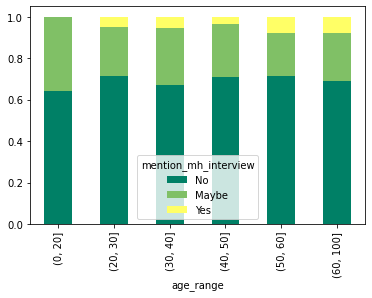

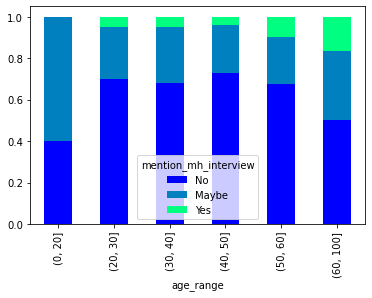

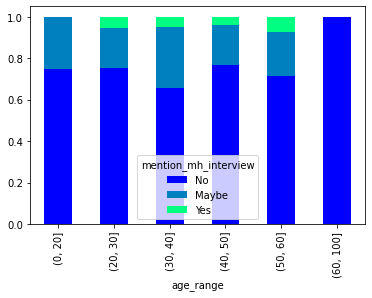

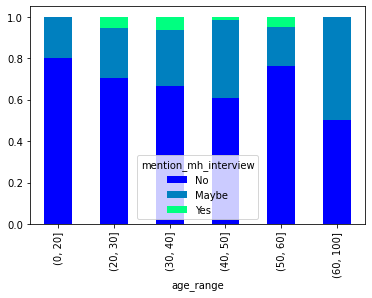

In [ ]:
# Age Range
age_nums= cd.pivot_table(index='age_range', columns='mention_mh_interview', aggfunc='size')
age_nums["sum"] = age_nums.sum(axis=1)
print(age_nums, '\n\n')

age_props = age_nums.loc[:,"Maybe":"Yes"].div(age_nums["sum"], axis=0)
age_props = age_props.reindex(columns=["No", "Maybe", "Yes"])
print(age_props)

#2017
age_nums_17 = cd_2017.pivot_table(index='age_range', columns=['mention_mh_interview'], aggfunc='size')
age_nums_17["sum"] = age_nums_17.sum(axis=1)

age_props_17 = age_nums_17.loc[:,"Maybe":"Yes"].div(age_nums_17["sum"], axis=0)
age_props_17 = age_props_17.reindex(columns=["No", "Maybe", "Yes"])
#print("age_props_17: \n\n", age_props_17, '\n\n')

#2018
age_nums_18 = cd_2018.pivot_table(index='age_range', columns=['mention_mh_interview'], aggfunc='size')
age_nums_18["sum"] = age_nums_18.sum(axis=1)

age_props_18 = age_nums_18.loc[:,"Maybe":"Yes"].div(age_nums_18["sum"], axis=0)
age_props_18 = age_props_18.reindex(columns=["No", "Maybe", "Yes"])
#print("age_props_18: \n\n", age_props_18, '\n\n')

#2019
age_nums_19 = cd_2019.pivot_table(index='age_range', columns=['mention_mh_interview'], aggfunc='size')
age_nums_19["sum"] = age_nums_19.sum(axis=1)

age_props_19 = age_nums_19.loc[:,"Maybe":"Yes"].div(age_nums_19["sum"], axis=0)
age_props_19 = age_props_19.reindex(columns=["No", "Maybe", "Yes"])
#print("age_props_19: \n\n", age_props_18, '\n\n')

#plots
age_props.plot(kind='bar', stacked=True, colormap='summer')
print('\n\n')
age_props_17.plot(kind='bar', stacked=True, colormap='winter')
print('\n\n')
age_props_18.plot(kind='bar', stacked=True, colormap='winter')
print('\n\n')
age_props_19.plot(kind='bar', stacked=True, colormap='winter')

# Company type

## Tech company

[True nan False]
mention_mh_interview  Maybe   No  Yes  sum
tech_company                              
False                    85  239   10  334
True                    244  676   54  974 


mention_mh_interview        No     Maybe       Yes
tech_company                                      
False                 0.715569  0.254491  0.029940
True                  0.694045  0.250513  0.055441


<AxesSubplot:xlabel='tech_company'>

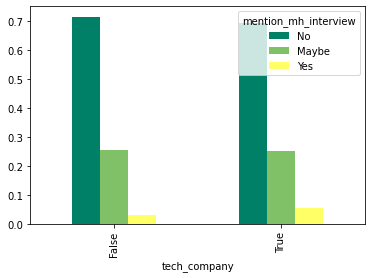

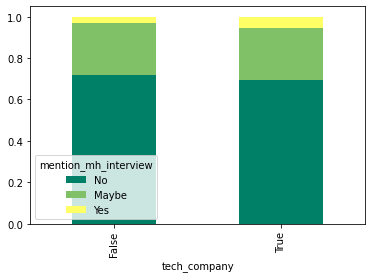

In [ ]:
print(cd["tech_company"].unique())
tech_nums= cd.pivot_table(index='tech_company', columns='mention_mh_interview', aggfunc='size')
tech_nums["sum"] = tech_nums.sum(axis=1)
print(tech_nums, '\n\n')

tech_props = tech_nums.loc[:,"Maybe":"Yes"].div(tech_nums["sum"], axis=0)
tech_props = tech_props.reindex(columns=["No", "Maybe", "Yes"])
print(tech_props)

#plots
tech_props.plot(kind='bar', colormap='summer')
tech_props.plot(kind='bar', stacked=True, colormap='summer')

# Company size

['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']
mention_mh_interview  Maybe   No  Yes  sum
company_size                              
1-5                      13   15    4   32
100-500                  79  267   18  364
26-100                   70  156   17  243
500-1000                 26   75    5  106
6-25                     54  125   10  189
More than 1000           87  277   10  374 


mention_mh_interview        No     Maybe       Yes
company_size                                      
1-5                   0.468750  0.406250  0.125000
100-500               0.733516  0.217033  0.049451
26-100                0.641975  0.288066  0.069959
500-1000              0.707547  0.245283  0.047170
6-25                  0.661376  0.285714  0.052910
More than 1000        0.740642  0.232620  0.026738


<AxesSubplot:xlabel='company_size'>

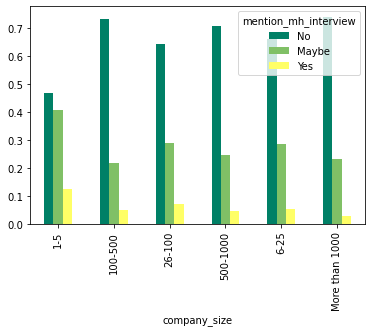

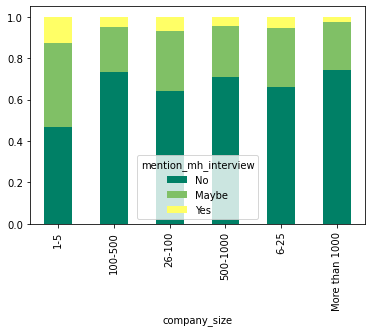

In [ ]:
print(cd["company_size"].unique())
cosize_nums= cd.pivot_table(index='company_size', columns='mention_mh_interview', aggfunc='size')
cosize_nums["sum"] = cosize_nums.sum(axis=1)
print(cosize_nums, '\n\n')

cosize_props = cosize_nums.loc[:,"Maybe":"Yes"].div(cosize_nums["sum"], axis=0)
cosize_props = cosize_props.reindex(columns=["No", "Maybe", "Yes"])
print(cosize_props)

#plots
cosize_props.plot(kind='bar', colormap='summer')
cosize_props.plot(kind='bar', stacked=True, colormap='summer')

## Anonymity

["I don't know" 'Yes' nan 'No']
mention_mh_interview  Maybe   No  Yes  sum
anonymity                                 
I don't know            194  575   35  804
No                       10   51    3   64
Yes                     125  289   26  440 


mention_mh_interview        No     Maybe       Yes
anonymity                                         
I don't know          0.715174  0.241294  0.043532
No                    0.796875  0.156250  0.046875
Yes                   0.656818  0.284091  0.059091


<AxesSubplot:xlabel='anonymity'>

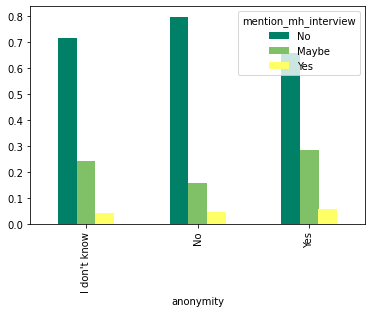

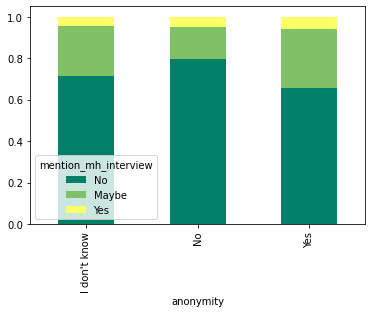

In [ ]:
print(cd["anonymity"].unique())
anon_nums= cd.pivot_table(index='anonymity', columns='mention_mh_interview', aggfunc='size')
anon_nums["sum"] = anon_nums.sum(axis=1)
print(anon_nums, '\n\n')

anon_props = anon_nums.loc[:,"Maybe":"Yes"].div(anon_nums["sum"], axis=0)
anon_props = anon_props.reindex(columns=["No", "Maybe", "Yes"])
print(anon_props)

#plots
anon_props.plot(kind='bar', colormap='summer')
anon_props.plot(kind='bar', stacked=True, colormap='summer')

## Mental Health Benefits (mh_benefits)

['Not eligible for coverage / NA' 'No' nan 'Yes' "I don't know"]
mention_mh_interview            Maybe   No  Yes  sum
mh_benefits                                         
I don't know                       96  231   12  339
No                                 45  113   10  168
Not eligible for coverage / NA     13   47    5   65
Yes                               175  524   37  736 


mention_mh_interview                  No     Maybe       Yes
mh_benefits                                                 
I don't know                    0.681416  0.283186  0.035398
No                              0.672619  0.267857  0.059524
Not eligible for coverage / NA  0.723077  0.200000  0.076923
Yes                             0.711957  0.237772  0.050272


<AxesSubplot:xlabel='mh_benefits'>

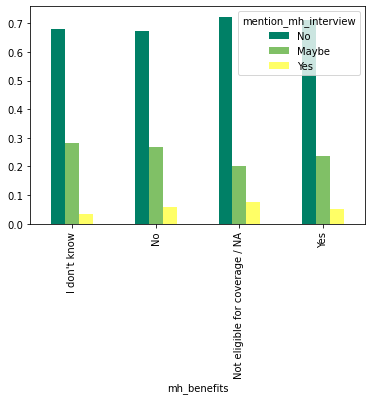

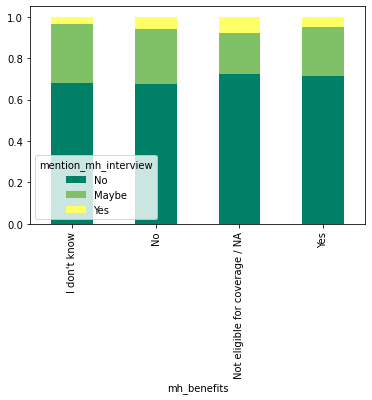

In [ ]:
# 'mh_benefits', 'anonymity', 'leaving_difficulty', 'disc_mh_coworker',
#        'disc_mh_supervisor', 'reveal_mh_business', 'reveal_mh_coworkers',
#        'affects_productivity', 'productivity_percent', 'mention_ph_interview',
#        'mention_mh_interview', 'share_mh_ff', 'exp_unsupport', 'reveal_less',
#        'family_history', 'mh_in_past', 'mh_currently', 'mh_diagnosed',
#        'sought_treatment', 'age', 'gender', 'country_live', 'state_live',
#        'country_work', 'state_work', 'year', 'gender_cleaned', 'age_range'],
#       dtype='object')

print(cd["mh_benefits"].unique())
ben_nums= cd.pivot_table(index='mh_benefits', columns='mention_mh_interview', aggfunc='size')
ben_nums["sum"] = ben_nums.sum(axis=1)
print(ben_nums, '\n\n')

ben_props = ben_nums.loc[:,"Maybe":"Yes"].div(ben_nums["sum"], axis=0)
ben_props = ben_props.reindex(columns=["No", "Maybe", "Yes"])
print(ben_props)

#plots
ben_props.plot(kind='bar', colormap='summer')
ben_props.plot(kind='bar', stacked=True, colormap='summer')

# Hypothesis Testing 
### Ideas:
H_0: There proportion of people who would mention their mental health in an interview is the same as the proportion of people who would mention their physical health in an interview.

H_0: The proportion of men who would mention their mental health in an interview is the same as that of women. 

H_0: There proportion of people who would mention their mental health in an interview has stayed the same thorughout 2017, 2018, and 2019.

confidence intervals? Confidence intervals for 2017, 2018, 2019 of true population proportion of people who would mention their mental health in an interview

also look at no vs yes vs maybe 
anonymity for maybe?
probably need to do boostrapping since no population means? 

In [ ]:
#people who would mention mental health vs physical health in an interview
mmi = cd[cd["mention_mh_interview"] == "Yes"]
mpi = cd[cd["mention_ph_interview"] == "Yes"]

prop_mmi = len(mmi)/len(cd)
sigma_mmi = np.sqrt((prop_mmi*(1-prop_mmi)))

prop_mpi = len(mpi)/len(cd) 
sigma_mpi = np.sqrt((prop_mpi*(1-prop_mpi)))

ttest = stats.ttest_ind_from_stats(mean1=prop_mmi, std1=sigma_mmi, nobs1=len(cd),
                                   mean2=prop_mpi, std2=sigma_mpi, nobs2=len(cd), 
                                    alternative='two-sided')
p = ttest.pvalue
print(p)

#paired t test for whether there is a difference bt mh and ph questionable?
no16 = cd[~(cd["year"] == 2016)]
mapping = {'Yes': 1, 'Maybe': 0.5, "No": 0}


no16["mmi"] = no16["mention_mh_interview"].map(mapping)
no16["mpi"] = no16["mention_ph_interview"].map(mapping)

ttest2 = stats.ttest_rel(no16["mmi"], no16["mpi"], alternative='two-sided')
print(x.pvalue)

#men vs women mentioning mental health in interview 

f = cd[cd["gender_cleaned"] == "female"]
fy = f[f["mention_mh_interview"] == "Yes"]
prop_f = len(fy)/len(f)
sigma_f = np.sqrt((prop_f*(1-prop_f)))

m = cd[cd["gender_cleaned"] == "male"]
my = m[m["mention_mh_interview"] == "Yes"]
prop_m = len(my)/len(m)
sigma_m = np.sqrt((prop_m*(1-prop_m)))

ttest3 = stats.ttest_ind_from_stats(mean1=prop_f, std1=sigma_f, nobs1=len(f),
                                   mean2=prop_m, std2=sigma_m, nobs2=len(m), 
                                    alternative='less')

p3 = ttest3.pvalue
print(p3)

#people whose companies provided anonymity were more willing to share their mental health in an interview 
anon = cd[cd["anonymity"] == "Yes"]
ay = anon[anon["mention_mh_interview"] == "Yes"]
may = anon[anon["mention_mh_interview"] == "Maybe"]
prop_ay = (len(ay) + len(may))/len(anon)
sigma_ay = np.sqrt((prop_ay*(1-prop_ay)))

noanon = cd[cd["anonymity"] == "No"]
nay = noanon[noanon["mention_mh_interview"] == "Yes"]
nmay = noanon[noanon["mention_mh_interview"] == "Maybe"]
prop_nay = (len(nay) + len(nmay))/len(noanon)
sigma_nay = np.sqrt((prop_nay*(1-prop_nay)))

ttest4 = stats.ttest_ind_from_stats(mean1=prop_ay, std1=sigma_ay, nobs1=len(anon),
                                   mean2=prop_nay, std2=sigma_nay, nobs2=len(noanon), 
                                    alternative='two-sided')

p4 = ttest4.pvalue
print(p4)

1.8093471603367375e-134
1.466858029236454e-132
0.0005935993876859472
0.0013064963335801601


<ipython-input-41-4eb459bf59e6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no16["mmi"] = no16["mention_mh_interview"].map(mapping)
<ipython-input-41-4eb459bf59e6>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no16["mpi"] = no16["mention_ph_interview"].map(mapping)


In [ ]:
#Maybe regression? 


# from sklearn.preprocessing import OneHotEncoder
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import plot_confusion_matrix
# import matplotlib.pyplot as plt # just to format confusion matrix

# # Write your code for question 4 here
# # and store your results in the correct variable names for full credit
# from sklearn import metrics
# data_1 = np.append(OneHotEncoder().fit_transform(no16[["species", "sex"]].values).toarray(),
#                   penguins[["bill_length_mm", "bill_depth_mm"]], axis=1)


# data = 


# target = no16["mmi"].values